# Statistical Analysis using Python

### Descriptive Statstics in python:
Descriptive statistics involve summarizing and analyzing the key features of a dataset to provide insights into the data’s distribution and spread. These statistics offer a basic understanding of the data, helping to describe its central tendency, dispersion, and shape.
{ython provides modules like <code>pandas</code> and <code>numpy</code> to perform descriptive statistics. 

### Inferential statistics in Python:
Inferential statistics involves methods for making predictions or generalizations about a population based on a sample of data. Some techniques are:
1. **Hypothesis testing**: Used to determine whether there is enough evidence to reject a null hypothesis.
2. **Confidence Intervals**: Provide a range of values that likely contain the population parameter.
3. **Regression Analysis**: Examines relationships between variables.

Python provides different modules to perform inferential statistics:
1. **SciPy**: For statistical tests and function.
2. **Statsmodels**: For statistical models and tests.
3. **Seaborn and Matplotlib**: For visualizing statistical data.

## Analyzing a Health-Related Dataset

### Import required packages and modules.

In [1]:
import pandas as pd
import scipy.stats as stats
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

### Get the data from the Dataset.
Here we used Diabetes Dataset that contains the following attributes:

1. **Pregnancies**: To express the Number of pregnancies
2. **Glucose**: To express the Glucose level in blood
3. **BloodPressure**: To express the Blood pressure measurement
4. **SkinThickness**: To express the thickness of the skin
5. **Insulin**: To express the Insulin level in blood
6. **BMI**: To express the Body mass index
7. **DiabetesPedigreeFunction**: To express the Diabetes percentage
8. **Age**: To express the age
9. **Outcome**: To express the final result 1 is Yes and 0 is No

In [2]:
data=pd.read_csv("diabetes.csv")

In [3]:
# convert data into dataframe
df=pd.DataFrame(data)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


### Calculate Descriptive Statistics:

#### mean:

In [4]:
print("Mean:\n\n",df.mean())

Mean:

 Pregnancies                   3.845052
Glucose                     120.894531
BloodPressure                69.105469
SkinThickness                20.536458
Insulin                      79.799479
BMI                          31.992578
DiabetesPedigreeFunction      0.471876
Age                          33.240885
Outcome                       0.348958
dtype: float64


#### median:

In [5]:
print("Median:\n\n",df.median())

Median:

 Pregnancies                   3.0000
Glucose                     117.0000
BloodPressure                72.0000
SkinThickness                23.0000
Insulin                      30.5000
BMI                          32.0000
DiabetesPedigreeFunction      0.3725
Age                          29.0000
Outcome                       0.0000
dtype: float64


#### mode:

In [6]:
print("Mode:\n\n",df.mode().iloc[0])

Mode:

 Pregnancies                  1.000
Glucose                     99.000
BloodPressure               70.000
SkinThickness                0.000
Insulin                      0.000
BMI                         32.000
DiabetesPedigreeFunction     0.254
Age                         22.000
Outcome                      0.000
Name: 0, dtype: float64


#### Standard Deviation:

In [7]:
print("Standard Deviation:\n\n",df.std())

Standard Deviation:

 Pregnancies                   3.369578
Glucose                      31.972618
BloodPressure                19.355807
SkinThickness                15.952218
Insulin                     115.244002
BMI                           7.884160
DiabetesPedigreeFunction      0.331329
Age                          11.760232
Outcome                       0.476951
dtype: float64


#### Variance:

In [8]:
print("Variance:\n\n",df.var())

Variance:

 Pregnancies                    11.354056
Glucose                      1022.248314
BloodPressure                 374.647271
SkinThickness                 254.473245
Insulin                     13281.180078
BMI                            62.159984
DiabetesPedigreeFunction        0.109779
Age                           138.303046
Outcome                         0.227483
dtype: float64


### Calculate Inferential Statistics:

#### Hypothesis Testing:

In [9]:
# Null Hypothesis
H0="Average Insulin level in Diabetes disease patients is 80"

In [10]:
insulin=df.Insulin;

In [11]:
# p test values
t_stat,p_value=stats.ttest_1samp(insulin, 80)

In [12]:
print(t_stat)
print(p_value)

-0.04821939734450303
0.9615539440816143


Since the p-value (0.9616) is much greater than 0.05, you do not reject the null hypothesis. 

#### Confidence intervals:

In [13]:
sample_mean = np.mean(insulin)
standard_error = stats.sem(insulin)

# Compute 95% confidence interval for BMI
confidence_interval = stats.norm.interval(0.95, loc=sample_mean, scale=standard_error)

print(f"95% Confidence Interval for Insulin: {confidence_interval}")

95% Confidence Interval for Insulin: (71.64894985425323, 87.95000847908011)


Since 80 falls within this confidence interval, it supports the conclusion that the true mean insulin level might reasonably be 80.

## Exploring Regression Analysis:

### Linear Regression

A linear regression analysis is performed to determine the relationship between BMI(independent variable) and Blood Pressure(Dependent) variable.

In [30]:
X = sm.add_constant(df['BMI']) # add constant for intercept
y = df['BloodPressure']

# Create the model and fit it
model = sm.OLS(y, X).fit() # use the Ordinary Least Squares Regression

# Print the summary of the regression
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          BloodPressure   R-squared:                       0.079
Model:                            OLS   Adj. R-squared:                  0.078
Method:                 Least Squares   F-statistic:                     66.08
Date:                Fri, 06 Sep 2024   Prob (F-statistic):           1.74e-15
Time:                        18:06:29   Log-Likelihood:                -3333.0
No. Observations:                 768   AIC:                             6670.
Df Residuals:                     766   BIC:                             6679.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.9718      2.804     16.750      0.0

<br>

**Coefficient for BMI:** 0.6918
This indicates that for every 1 unit increase in BMI, blood pressure increases by approximately 0.69 units.
Since the coefficient is positive, it confirms that there's a positive relationship between BMI and blood pressure.

**P-value for BMI:** 0.000 (< 0.05)
The p-value is extremely small, indicating that the relationship between BMI and blood pressure is statistically significant.

**R-squared:** 0.079 (or 7.9%)
This means that BMI explains about 7.9% of the variability in blood pressure.

Hence, there is a significant positive relationship between BMI and blood pressure, but BMI alone explains only about 7.9% of the variation in blood pressure. Other factors may play a larger role in determining blood pressure, so it would be worthwhile to explore additional variables.

### Visualizing the results:

A Scatter plot along with a regression line is used to visualize the relatio between BMI and Blood Pressure.

Text(0, 0.5, 'BloodPressure')

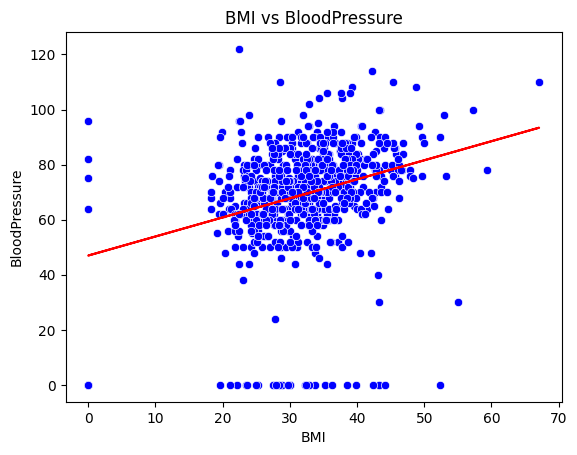

In [32]:
sns.scatterplot(x='BMI', y='BloodPressure', data=df, color='blue')
plt.plot(df['BMI'], model.predict(X), color='red')
plt.title('BMI vs BloodPressure')
plt.xlabel('BMI')
plt.ylabel('BloodPressure')

Text(24.625000000000007, 0.5, 'BloodPressure')

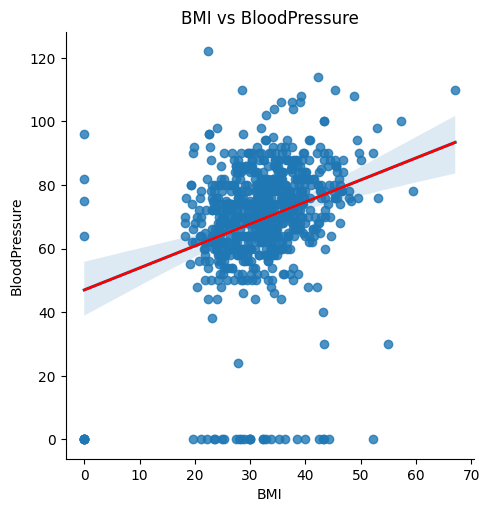

In [29]:
sns.lmplot(x='BMI', y='BloodPressure', data=df)
plt.plot(df['BMI'], model.predict(X), color='red')
plt.title('BMI vs BloodPressure')
plt.xlabel('BMI')
plt.ylabel('BloodPressure')

<br>


**Positive Trend:** As BMI increases, blood pressure tends to increase, as indicated by the upward slope of the red line.
<br>
**Variability:** There’s significant scatter in the data, especially for higher BMIs, indicating that while BMI has some influence on blood pressure, other factors also contribute to blood pressure levels.

## Conclusion:

We explored a health-related dataset and aimed to understand both the descriptive statistics and the relationship between key features through regression analysis. 

Python played a key role in analyzing the dataset by providing powerful libraries for data manipulation, statistical analysis, and visualization:

**Pandas:** Helped load and manage the dataset, allowing easy calculation of descriptive statistics like mean, median, and standard deviation.

**SciPy/Statsmodels:** Performed hypothesis testing and calculated confidence intervals.

**Statsmodels/Scikit-learn:** Conducted linear regression analysis to explore relationships between variables, generating key statistics like coefficients and p-values.

**Matplotlib/Seaborn:** Created visualizations to display the relationships between variables and illustrate the regression line.

These libraries made complex analysis and data visualization easy and efficient.